In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

# Visalization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing data
df = pd.read_csv('data.csv')
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [6]:
# Printing last 3 rows
df.tail(4)

,Kyphosis,Age,Number,Start
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [7]:
# Printing column names
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [ ]:
# Exploratory Data Analysis

In [8]:
# Getting dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [9]:
# getting summary

df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [10]:
# checking null values

df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [11]:
df.nunique()

Kyphosis     2
Age         64
Number       8
Start       16
dtype: int64

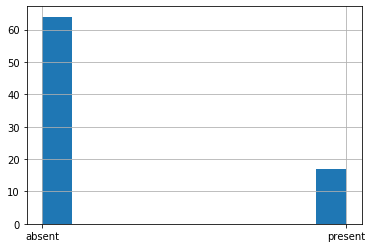

In [12]:
df['Kyphosis'].hist()

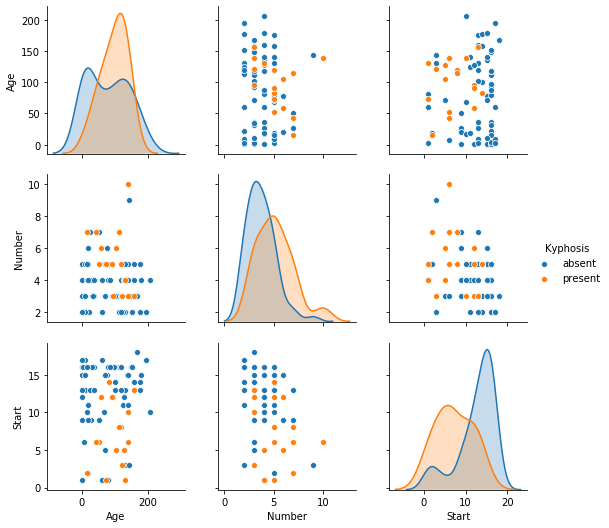

In [13]:
# Visualizing Dataset
sns.pairplot(df, hue = 'Kyphosis')

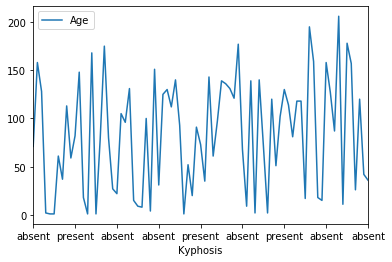

In [14]:
df.plot(x="Kyphosis", y=['Age'])
plt.show()

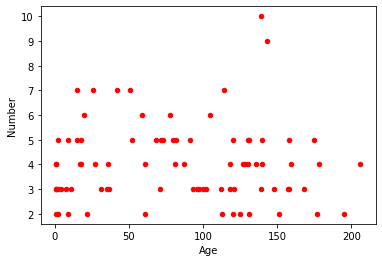

In [15]:
df.plot(kind='scatter',x='Age',y='Number',color='red')
plt.show()

In [17]:
# Training and Testing set splitting

from sklearn.model_selection import train_test_split

X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [18]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [19]:
y.head(3)

0     absent
1     absent
2    present
Name: Kyphosis, dtype: object

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3)

In [22]:
# Building and Training our Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [23]:
model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
predictions = model.predict(test_x)

In [25]:
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'present', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [26]:
# Measuring the Performance of Our Decision Tree Model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



In [27]:
print(confusion_matrix(test_y, predictions))
#18 = TP - when a case was negative and predicted negative
#2 = FN - when a case was positive and predicted positve
#2 = FP - when a case was positive but predicted negative
#3 = T- when a case was negative but predicted positive

[[18  2]
 [ 2  3]]


In [28]:
# Building and Training Our Random Forests Model

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()

In [29]:
random_forest_model.fit(train_x, train_y)

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
random_forest_predictions = random_forest_model.predict(test_x)

In [31]:
random_forest_predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'present',
       'absent'], dtype=object)

In [32]:
print(classification_report(test_y, random_forest_predictions))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [33]:
print(confusion_matrix(test_y, random_forest_predictions))

[[18  2]
 [ 3  2]]


In [1]:
# After evaluating both models the Best model is decision tree classifier for this specific Problem.